In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.metrics import silhouette_score

In [3]:
url_2d = 'data_2d.csv'
df_2d = pd.read_csv(url_2d)

(df_2d.head())

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


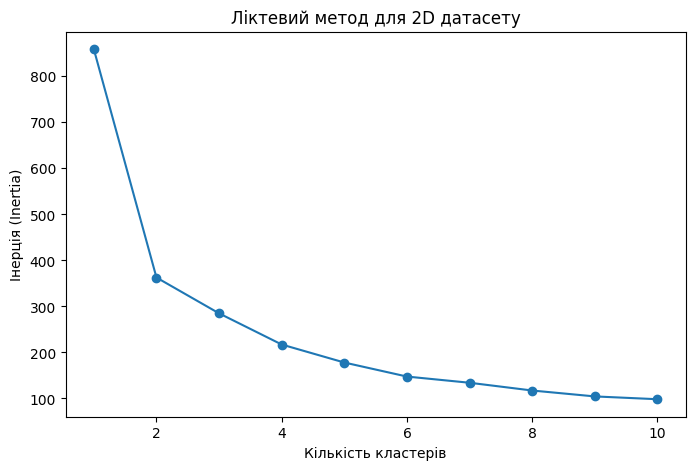

In [4]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_2d)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція (Inertia)')
plt.title('Ліктевий метод для 2D датасету')
plt.show()

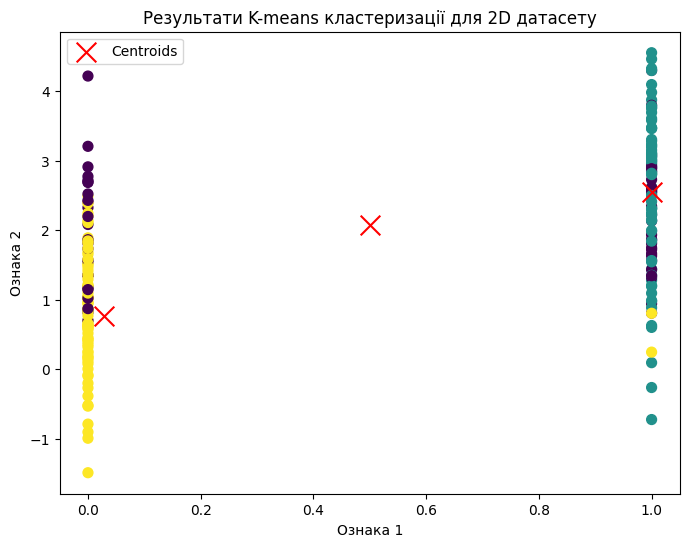

In [5]:
optimal_k = 3
kmeans_2d = KMeans(n_clusters=optimal_k, random_state=42)
df_2d['Cluster'] = kmeans_2d.fit_predict(df_2d)

plt.figure(figsize=(8, 6))
plt.scatter(df_2d.iloc[:, 0], df_2d.iloc[:, 1], c=df_2d['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], 
            c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.title('Результати K-means кластеризації для 2D датасету')
plt.legend()
plt.show()

In [15]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_mnist = mnist.data
(f"Форма MNIST датасету: {X_mnist.shape}")
X_mnist

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

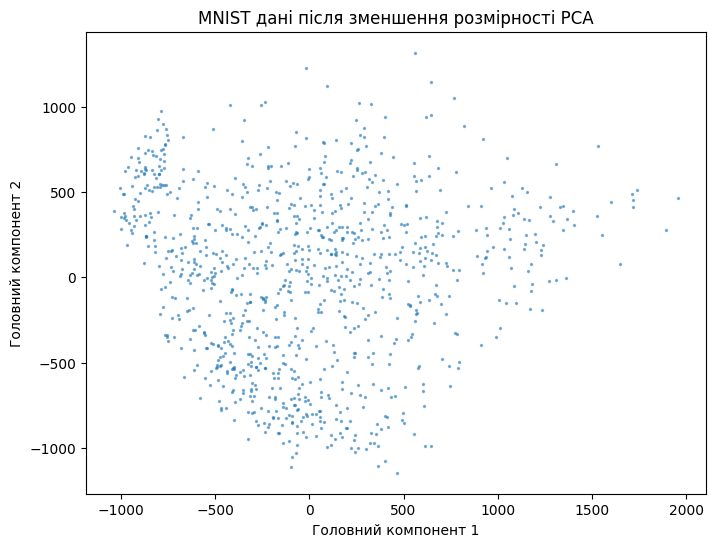

In [16]:
pca = PCA(n_components=2)
X_mnist_pca = pca.fit_transform(X_mnist)

plt.figure(figsize=(8, 6))
plt.scatter(X_mnist_pca[:1000, 0], X_mnist_pca[:1000, 1], s=2, alpha=0.5)
plt.xlabel('Головний компонент 1')
plt.ylabel('Головний компонент 2')
plt.title('MNIST дані після зменшення розмірності PCA')
plt.show()

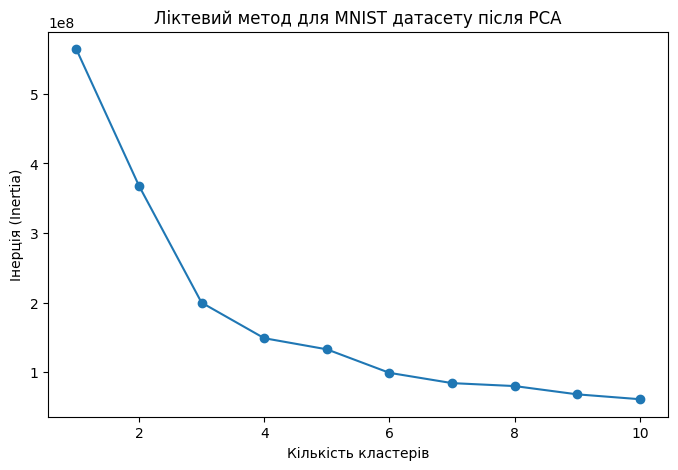

In [17]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_mnist_pca[:1000])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція (Inertia)')
plt.title('Ліктевий метод для MNIST датасету після PCA')
plt.show()